# **[ Building Classification Models with Scikit-learn ]**


## **프로젝트 요약**

> 본 프로젝트는 Scikit-learn 패키지를 활용하여 다양한 분류모델을 구현하고 성능을 평가한 후 최종적으로는 최적의 모델을 선정하는 것을 목표로 한다. 
<br>
이를 위해 sklearn패키지에서 제공하는 분류용 예제 데이터셋인 손글씨숫자데이터, 와인데이터, 유방암진단데이터 를 사용하였다.
<br>
각 프로젝트는 ~~~~단계로 이루어져있다.(수행하였다)
<br>
손글씨 프로젝트 결과(데이터셋소개-전처리-모델링-평가)
<br>
와인 프로젝트 결과
<br>
유방암 프로젝트 결과
<br>
회고 **적기**

## **목차**
- [**1. 손글씨 이미지 분류**](#--1-------------)
  * [**1-0. 문제 정의**](#1-0-문제-정의)
  * [**1-1. 데이터 불러오기**](#1-1.-데이터-불러오기)
  * [**1-2. 탐색적 데이터 분석 및 전처리**](#--1-2--------------------)
  * [**1-3. 피쳐 엔지니어링**](#--1-3-----------)
  * [**1-4. 모델 구현 및 평가**](#--1-4-------------)



## **0. 사전정의**
---

In [2]:
############################################## 라이브러리 불러오기 #####################################################

import numpy as np
import pandas as pd
import platform
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 시각화
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 코랩)    

        ! sudo apt-get update -qq
        ! sudo apt-get install fonts-nanum* -qq #나눔글꼴 설치
        ! sudo fc-cache -fv #폰트캐시 삭제

        # 나눔글꼴 matplotlib에 복사 (파이썬 버전 확인하는것 중요 !)
        ! sudo cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
        # matplotlib 캐시삭제
        try:
          ! rm -rf /content/.cache/matplotlib/* #colab
        except:
          ! rm -rf /home/ubuntu/.cache/matplotlib/* #ubuntu


        sys_font=fm.findSystemFonts()
        nanum_font = [f for f in sys_font if 'NanumGothicCoding.ttf' in f][0]
        font_name = fm.FontProperties(fname=nanum_font, size=10).get_name()
        plt.rc('font', family=font_name)


plt.rcParams['axes.unicode_minus'] = False 
# fm._rebuild()

# 데이터셋 
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine 
from sklearn.datasets import load_breast_cancer

# 데이터셋분리, 교차검증, 하이퍼파라미터튜닝  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ml 알고리즘 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 전처리 (정규화, 스케일링 등')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder

# 모델 성능 평가 지표 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from sklearn.metrics import f1_score # F1 스코어 
from sklearn.metrics import roc_auc_score



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155514 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
S

## **1. 손글씨 이미지 분류** <a class="anchor" id="chapter1"></a> 
---


### **1-0. 문제 정의**
----

#### **1-0.1. 프로젝트 목표**  
<div>
본 프로젝트는 손글씨 이미지가 주어졌을 때, 해당 이미지가 어떤 숫자에 해당하는지를 예측하는 모델을 Scikit-learn을 활용하여 구현하는 것을 목표로 한다. 

<br> 
아래 사진을 보면 
<img src='./src/img/digits_img.jpeg'>
</div>

<br> 
#### **1-0.2. 분석 데이터 정의** 
<div> 
데이터는 sklearn.dataset 안에 빌트인 데이터셋으로 제공하는 손글씨 데이터셋을 사용한다. 
해당 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용하는데, key-value 형식으로 구성되어 있으며, 딕셔너리 타입과 유사한 구조를 가지고 있다. 
<br>
데이터셋의 세부적인 구성은 아래 표에서 확인할 수 있다. 
<br>
</br>

| 속성 | 설명 |
| --- | --- |
| data | 샘플데이터, 평명화된 (1797, 64) 크기의 ndarray  |
| images | (1797, 8,8) 크기의 ndarray  |
| target | label 데이터, (1797, ) 크기의 ndarray  |
| feature_names | Feature 데이터 이름 |
| target_names | Label 데이터 이름 |
| DESCR | 데이터 세트에 대한 전체 설명 |

</div> 
<br> 

#### **1-0.3. 모델링 task 정의**  
<div> 
컴퓨터는 이미지를 색을 나타내는 숫자의 배열로 인식한다. 데이터셋의 image와 data 또한 숫자들의 배열로 구성되어있다. 해당 프로젝트의 task는 data 또는 image의 배열값으로 어떤 숫자를 가리키는지를 예측하는 "분류" 에 속한다.




### **1-1. 데이터 불러오기**
----

In [16]:
############################## 데이터 로드 & 확인 ##############################

digits = load_digits()
digits_data = digits.data
digits_image = digits.images
digits_label = digits.target
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df['label'] =  digits.target
print("############################## 데이터 설명 ##############################\n")
print(digits.DESCR)

print("\n############################## 데이터 확인 ##############################\n")
print(f' 샘플데이터 크기 : {digits_data.shape}')
print(f' 이미지데이터 크기 : {digits_image.shape}')
print(f' 정답데이터 크기 : {digits_label.shape}')

print("\n############################## 데이터프레임 확인 ##############################\n")

digits_df.head()

############################## 데이터 설명 ##############################

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlap

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


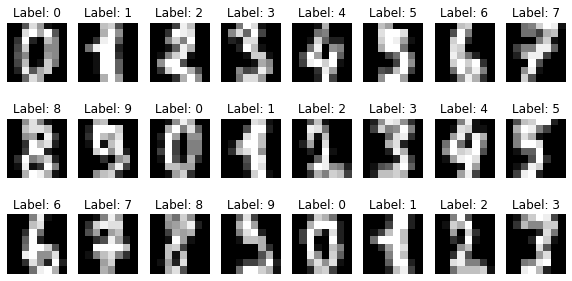

In [15]:
############################## 손글씨 이미지 확인 ##############################
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(10,5))
for ax, image, label in zip(axes.flat, digits_image, digits_label):
    ax.set_axis_off()
    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {label}" )

### **1-2. 탐색적 데이터 분석 및 전처리**


#### 1-2-1. 데이터 타입 확인

In [17]:
############################## 컬럼별 데이터 타입확인 ##############################
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

모두 숫자로 이루어진 데이터인걸 알 수 있다.


#### 1-2-2. 통계값 확인

In [18]:
############################## 컬럼별 간단한 통계값 확인 ##############################
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


#### 1-2-3. 결측값 확인

In [19]:
############################## 결측여부 확인 ##############################
digits_df.isnull().any().any()

False

#### 1-2-4. 중복값 확인

In [20]:
############################## 중복된 항목 수 확인 ##############################
print("중복된 항목 수 :", len(digits_df[digits_df.duplicated()])) 

중복된 항목 수 : 0


#### 1-2-5. target feature 정의

In [23]:
############################## target feature 확인 ##############################
print("target feature의 class확인 :", digits.target_names) 


target feature의 class확인 : [0 1 2 3 4 5 6 7 8 9]


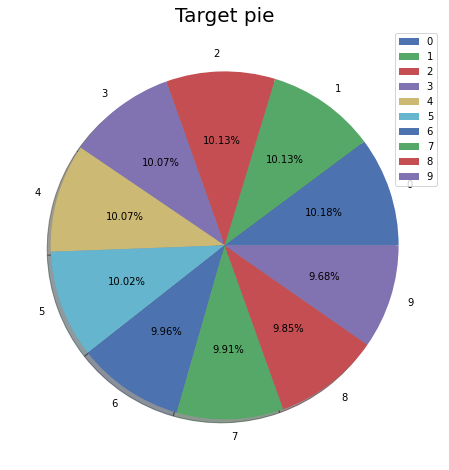

In [31]:
############################## target class 분포 확인 ##############################
labels = digits.target_names
size = digits_df['label'].value_counts()

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target pie', fontsize = 20)
plt.legend()



파이차트를 그려본 결과, 클래스의 분포가 균일한것을 알 수 있다. 데이터 분포가 불균형한 경우에는 과적합의 문제가 발생할 수 있어서 샘플링(Under Sampling, Over Sampling) 등의 방법을 이용하여 해결을 하지만, 현재의 경우에는 매우 균일하게 분포가 되어있어서 샘플링 과정은 생략하도록 한다.

In [ ]:
############################## 데이터 정규화 ##############################


데이터 정규화는 0~1 사이 값을 가지도록 하는 것인데, 

#### 1-2-6. 데이터 정규화

In [ ]:
############################## 데이터 정규화 ##############################


데이터 정규화는 0~1 사이 값을 가지도록 하는 것인데, 

### **1-4. 모델 구현 및 평가**
- 예측 모델 학습
- 모델 성능 개선
- 성능 평가
- 최종 모델 선정

In [ ]:
class CreateModel:
    def __init__(self, data):
    
    def split_data(self,):
      self.X_train, self.X_test, self.y_train, self.y_test = train_test_split( 
             data.data,
             data.target,
             test_size=0.3)
        
    def training_model(self, estimator):  

    
    def evaluate_model(self, matrix):
      

In [ ]:

# 모델과 모델의 파라미터 정의

models = {"DecisionTreeClassifier": DecisionTreeClassifier(),
          "RandomForestClassifier": RandomForestClassifier(),
          "SVM"                   : svm.SVC(),
          "SGDClassifier"         : SGDClassifier(),
          "LogisticRegression"    : LogisticRegression()}


params = {"DecisionTreeClassifier":  ["min_samples_split": [2,3,4,5,6], 
                                      "min_samples_leaf" : [1,2,3],
                                      "max_depth"        : [2,3,4,5,6], 
                                      "max_features"     : [None,'sqrt','log2',3,4,5]}
                                      "max_leaf_nodes"   : [2,3,4,5,6,7]]
          "RandomForestClassifier": RandomForestClassifier(),
          "SVM"                   : svm.SVC(),
          "SGDClassifier"         : SGDClassifier(),
          "LogisticRegression"    : LogisticRegression()}
